# Stock Technical Analysis: Python Tutorial

Commodity Channel Index (CCI)

Contact: andrewshamlet@gmail.com // @andrewshamlet

Python streamlines tasks requiring multiple steps in a single block of code. For this reason, it is a great tool for querying and performing analysis on data.

Last Tutorial, we outlined steps for calculating Rate of Change (ROC).

In this Tutorial, we introduce a new technical indicator, the Commodity Channel Index (CCI).

Developed by Donald Lambert, the Commodity Channel Index (CCI) is a versatile indicator that can be used to identify a new trend or warn of extreme conditions. CCI measures the current price level relative to an average price level over a given period of time. CCI is relatively high when prices are far above their average. CCI is relatively low when prices are far below their average. In this manner, CCI can be used to identify overbought and oversold levels.

The Commodity Channel Index (CCI) is calculated as follows:
    
        CCI = (Typical Price  -  n-period SMA of TP) / (Constant x Mean Deviation)

        Typical Price (TP) = (High + Low + Close)/3
        
        Constant = .015

Lambert set the Constant at .015 to ensure that approximately 70 to 80 percent of CCI values would fall between -100 and +100. This percentage also depends on the look-back period. A shorter CCI (10 periods) will be more volatile with a smaller percentage of values between +100 and -100. Conversely, a longer CCI (40 periods) will have a higher percentage of values between +100 and -100.

The Commodity Channel Index (CCI) can be used as either a coincident or leading indicator. As a coincident indicator, surges above +100 reflect strong price action that can signal the start of an uptrend. Plunges below -100 reflect weak price action that can signal the start of a downtrend.

As a leading indicator, chartists can look for overbought or oversold conditions that may foreshadow a mean reversion. Similarly, bullish and bearish divergences can be used to detect early momentum shifts and anticipate trend reversals.

Let’s use Python to compute the Commodity Channel Index (CCI).

1.) Import modules.

In [7]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

2.a.) Define function for querying daily close.

In [8]:
def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']

2.b.) Define function for querying daily high.

In [9]:
def get_high(stock,start,end):
     return web.DataReader(stock,'google',start,end)['High']

2.c.) Define function for querying daily low.

In [10]:
def get_low(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Low']

3.) Define function for Commodity Channel Index (CCI).

In [11]:
def CCI(close, high, low, n, constant):  
    TP = (high + low + close) / 3  
    CCI = pd.Series((TP - pd.rolling_mean(TP, n)) / (constant * pd.rolling_std(TP, n)), name = 'CCI_' + str(n))  
    return CCI

How does the CCI function work?

3.a.) Function calculates Typical Price as the sum of the (High, Low, and Close) divided by three. The function sets this value to variable TP.

In [ ]:
#TP = (high + low + close) / 3  

3.b.) Function subtracts n period simple moving average of the Typical Price from the current Typical Price. The difference is divided by the n period standard deviation of the Typical Price multiplied by the constant. The function sets this value to variable CCI. 

In [4]:
#CCI = pd.Series((TP - pd.rolling_mean(TP, n)) / (constant * pd.rolling_std(TP, n)), name = 'CCI_' + str(n))  

3.c.) Function returns CCI

In [5]:
#return CCI

4.) Query daily close, high, and low for ‘FB’ during 2016.

In [14]:
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['High'] = get_high('FB', '1/1/2016', '12/31/2016')
df['Low'] = get_low('FB', '1/1/2016', '12/31/2016')

5.) Run daily close, high, and low through CCI function. Save series to new column in dataframe. 

In [17]:
df['CCI'] = CCI(df['Close'], df['High'], df['Low'], 20, 0.015)
df.tail()

,Close,High,Low,CCI
Date,,,,
2016-12-23,117.27,117.56,116.30,-65.328137
2016-12-27,118.01,118.68,116.86,-28.569865
2016-12-28,116.92,118.25,116.65,-47.269293
2016-12-29,116.35,117.53,116.06,-67.659454
2016-12-30,115.05,116.83,114.77,-112.534146


6.) Plot daily close and CCI.

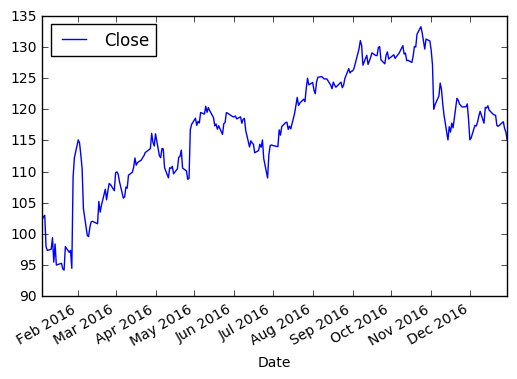

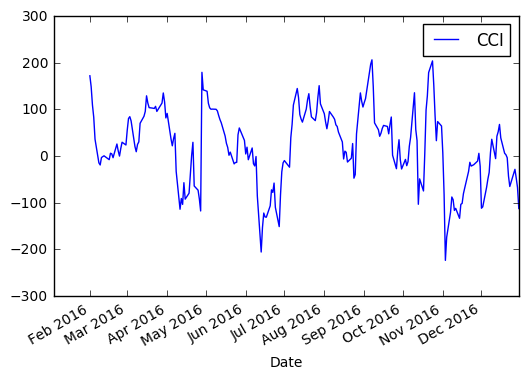

In [18]:
df.plot(y=['Close'])
df.plot(y=['CCI'])

There you have it! We created our CCI indicator. Here’s the full code:

In [19]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']
    
def get_high(stock,start,end):
     return web.DataReader(stock,'google',start,end)['High']
    
def get_low(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Low']
    
def CCI(close, high, low, n, constant):  
    TP = (high + low + close) / 3  
    CCI = pd.Series((TP - pd.rolling_mean(TP, n)) / (constant * pd.rolling_std(TP, n)), name = 'CCI_' + str(n))  
    return CCI
   
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['High'] = get_high('FB', '1/1/2016', '12/31/2016')
df['Low'] = get_low('FB', '1/1/2016', '12/31/2016')
df['CCI'] = CCI(df['Close'], df['High'], df['Low'], 20, 0.015)
df.tail()

,Close,High,Low,CCI
Date,,,,
2016-12-23,117.27,117.56,116.30,-65.328137
2016-12-27,118.01,118.68,116.86,-28.569865
2016-12-28,116.92,118.25,116.65,-47.269293
2016-12-29,116.35,117.53,116.06,-67.659454
2016-12-30,115.05,116.83,114.77,-112.534146
